## Table of Contents
- [Introduction](#introduction)
- [Exploratory Data Analysis Part 1 of 2](#exploratory-data-analysis-part-1-of-2)
- [Exploratory Data Analysis Part 2 of 2](#exploratory-data-analysis-part-2-of-2)
- [Data Preprocessing](#data-preprocessing)
- [Decision Tree](#decision-tree)
- [Natural Language Processing](#natural-language-processing)
- [Machine Learning Pipeline](#machine-learning-pipeline)
- [Conclusion](#conclusion)

## Introduction {#introduction}

Repairability of Consumer Electronics

Andrew Chau
kuzals@gmail.com
Summer 2023
BrainStation Toronto Data Science

This capstone project explores the success rate of repairing consumer electronics using various statistical modeling methods

## Exploratory Data Analysis Part 1 of 2 {#exploratory-data-analysis-part-1-of-2}
(refer to refer to Andrew_Chau_BrainStation_DS_Capstone_Book_1_EDA.ipynb for the EDA and cleaning )

## Exploratory Data Analysis Part 2 of 2 {#exploratory-data-analysis-part-2-of-2}
(refer to refer to Andrew_Chau_BrainStation_DS_Capstone_Book_1_EDA.ipynb for the EDA and cleaning )

## Data Preprocessing {#data-preprocessing}

importing the required libraries for data manipulation (Pandas and NumPy) and visualization (MatPlotLib and Seaborn)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''All lines of code to go from original dataset to cleaned dataset:

df = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

df["product_category_id"]=df["product_category_id"].apply(str)

df.loc[df.year_of_manufacture.between(0.0, 1919.0), ['year_of_manufacture', 'product_age']] = np.nan

df.loc[df['product_age'] < 0, 'product_age'] = 0

dfc = df
dfc.to_csv('Data/cleaned_OpenRepairData_v0.3_aggregate_202303.csv' , index=False)
dfc'''


reading in the cleaned dataset (refer to Andrew_Chau_BrainStation_DS_Capstone_Book_1_EDA.ipynb for the EDA and cleaning)

In [3]:
dfc = pd.read_csv("data/cleaned_OpenRepairData_v0.3_aggregate_202303.csv")

Verifying the cleaned dataset with .info(), .describe(), and .sample() <br>
Looks like partner_category_id and event_date lost their type changes when saved to .csv <br>
We won't be using those two columns, but let's change the datatypes anyway for the sake of consistency <br>
Everything else looks as it should, and we can move on to the next step <br>

In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             103076 non-null  object 
 1   data_provider                  103076 non-null  object 
 2   country                        103076 non-null  object 
 3   partner_product_category       103076 non-null  object 
 4   product_category               103076 non-null  object 
 5   product_category_id            103076 non-null  int64  
 6   brand                          103070 non-null  object 
 7   year_of_manufacture            37068 non-null   float64
 8   product_age                    37068 non-null   float64
 9   repair_status                  103076 non-null  object 
 10  repair_barrier_if_end_of_life  7268 non-null    object 
 11  group_identifier               103076 non-null  object 
 12  event_date                    

In [5]:
dfc['event_date'] = pd.to_datetime(dfc['event_date'], format='%Y-%m-%d')
dfc["product_category_id"]=dfc["product_category_id"].apply(str)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id                             103076 non-null  object        
 1   data_provider                  103076 non-null  object        
 2   country                        103076 non-null  object        
 3   partner_product_category       103076 non-null  object        
 4   product_category               103076 non-null  object        
 5   product_category_id            103076 non-null  object        
 6   brand                          103070 non-null  object        
 7   year_of_manufacture            37068 non-null   float64       
 8   product_age                    37068 non-null   float64       
 9   repair_status                  103076 non-null  object        
 10  repair_barrier_if_end_of_life  7268 non-null    object        
 11  

In [6]:
dfc.describe()

,year_of_manufacture,product_age
count,37068.000000,37068.000000
mean,2008.631326,11.896776
std,13.229585,13.123269
min,1920.000000,0.000000
25%,2006.000000,4.000000
50%,2013.000000,7.000000
75%,2017.000000,15.000000
max,2023.000000,103.000000


In [7]:
dfc.sample(20)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
36565,rcint_29449,Repair Café International,NLD,Household appliances electric ~ Milk frother,Small kitchen item,29,Inventum,2018.0,2.0,Fixed,NaN,0011,2020-02-08,melk koud
44964,rcint_15599,Repair Café International,NLD,Household appliances electric ~ Scales,Small kitchen item,29,Inventum,NaN,NaN,End of life,NaN,0025,2019-03-09,Doet niets meer Kilogram veer gebroken
4347,anstiftung_9402,anstiftung,DEU,Haushaltsgeräte ~ Kaffeemaschine,Coffee maker,36,Philips,NaN,NaN,End of life,Spare parts too expensive,2711,2022-03-15,Wasser heizt sich nicht auf
30279,rcint_19907,Repair Café International,NLD,Display and sound equipment ~ CD player / reco...,Hi-Fi separates,13,MT Logic,2010.0,9.0,Fixed,NaN,0004,2019-07-11,snoer/schakelaar kapot luidspreker aansluitkno...
50194,rcint_53465,Repair Café International,NLD,Display and sound equipment ~ Radio,Portable radio,23,Denver,NaN,NaN,Repairable,NaN,0411,2023-03-05,werkt niet meer Oplader defect Vervangen oplader
55974,restart_13039,The Restart Project,BEL,Sewing machine,Sewing machine,27,Unknown,NaN,NaN,Repairable,NaN,Gents Milieufront,2019-05-11,Naaimachine: aandrijfriem gebroken - Sewing ma...
81134,restart_19156,The Restart Project,GBR,Power tool ~ Strimmer,Power tool,24,Unknown,NaN,NaN,End of life,NaN,Share and Repair,2021-06-12,NaN
19275,rcint_47439,Repair Café International,GBR,Display and sound equipment ~ Sound bar,Hi-Fi separates,13,Yamaha,2002.0,20.0,End of life,NaN,0188,2022-10-30,No power
43142,rcint_23041,Repair Café International,NLD,Household appliances electric ~ Handheld vacuu...,Vacuum,34,AEG,NaN,NaN,End of life,NaN,0074,2019-10-11,NaN
61340,restart_8052,The Restart Project,CAN,Laptop medium ~ Laptop,Laptop,16,Unknown,NaN,NaN,End of life,NaN,Réparothons INSERTECH (Montreal),2018-04-24,NaN


### Feature Selection: <br>
The next step is to determine which data we will be using, and which data we won't be using. This dataset has a mix of categorical, numerical, and even string data. To begin with, we will choose categorical variables and run a decision-tree model.<br>
#### Of the 14 available columns: <br> 
repair_status contains our Target Variable. We'll be keeping this <br>
id, data_provider, group identifier, and event_date are of little to no relevance to someone looking to predict the repairability of their own item. We won't be keeping these <br>
product_category_id is just numbers tied to product_category and does not provide any additional information. We won't be keeping it. <br>
partner_product_category has over 9000 different unique values and does not provide all that much more information over just product_category. We won't be keeping it.<br> 
year_of_manufacture and product_age are interesting but have too many missing values and would severely limit the data available. We won't be keeping them for this model, but perhaps we can return to them later. <br>
repair_barrier_if_end_of_life is only used for when a product has been determined to be broken / End of Life and so would throw off the modeling. It also has nearly 100,000 missing values. We won't be keeping it but it's interesting enough to revisit at a later point <br>
problem is a text description of the issue with the item that requires repair, and won't be used in this model but we will definitely revisit it with NLP later. <br>
This leaves us with the columns of country, product_category, and brand, all of which are relevant and usable in our decision-tree model <br><br>
In summary, for our decision-tree model the features are going to all be categorical variables - country, product_category, and brand. Target variable will be repair_status.


In [8]:
dtdf = dfc[['repair_status', 'product_category', 'country','brand']]

In [9]:
dtdf = dtdf.drop(dtdf[dtdf['repair_status'] == 'Unknown'].index)
dtdf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

In [10]:
dtdf = dtdf.drop(dtdf[dtdf['repair_status'] == 'Repairable'].index)
dtdf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

In [11]:
repair_dataset = dtdf
print(repair_dataset["repair_status"].value_counts())

Fixed          54295
End of life    24433
Name: repair_status, dtype: int64


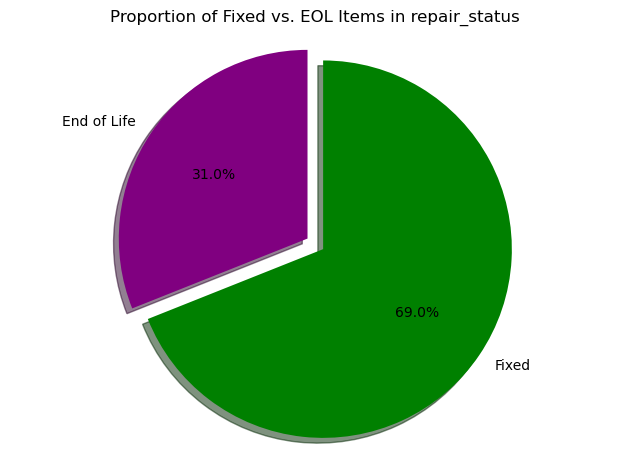

In [12]:
labels = ['End of Life', 'Fixed']
colours = ['purple','green']
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(repair_dataset.groupby('repair_status').size(), colors=colours, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Proportion of Fixed vs. EOL Items in repair_status')
plt.tight_layout()
plt.show()

In [13]:
fixed = repair_dataset[repair_dataset["repair_status"] == "Fixed"]
EOL  = repair_dataset[repair_dataset["repair_status"] == "End of life"]
print(fixed.shape)
print(EOL.shape)

(54295, 4)
(24433, 4)


# https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [17]:
from sklearn.utils import resample
fixed_downsample = resample(fixed,
             replace=True,
             n_samples=len(EOL),
             random_state=42)

print(fixed_downsample.shape)

(24433, 4)


In [21]:
data_downsampled = pd.concat([fixed_downsample, EOL])
print(data_downsampled["repair_status"].value_counts())

Fixed          24433
End of life    24433
Name: repair_status, dtype: int64


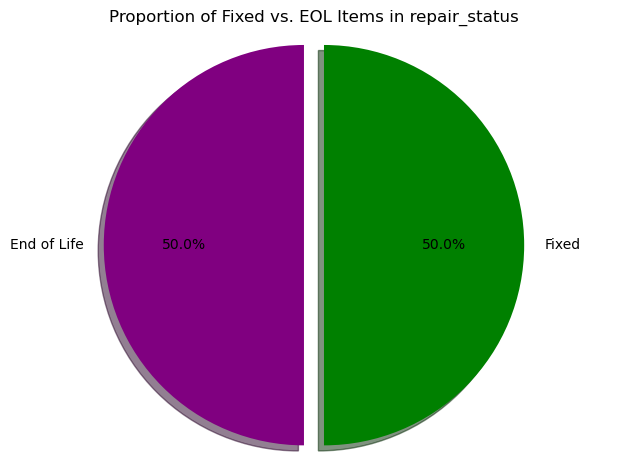

In [19]:
labels = ['End of Life', 'Fixed']
colours = ['purple','green']
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(data_downsampled.groupby('repair_status').size(), colors=colours, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Proportion of Fixed vs. EOL Items in repair_status')
plt.tight_layout()
plt.show()

In [22]:
dtdf = data_downsampled

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
#label_encoder = LabelEncoder()
y = dtdf['repair_status']
y

29637           Fixed
1511            Fixed
72674           Fixed
84936           Fixed
21077           Fixed
             ...     
103054    End of life
103062    End of life
103065    End of life
103067    End of life
103068    End of life
Name: repair_status, Length: 48866, dtype: object

In [25]:
dtdf[['product_category','country','brand']]

,product_category,country,brand
29637,Hi-Fi separates,NLD,Denon
1511,Portable radio,DEU,Kenwood
72674,Portable radio,GBR,Unknown
84936,Food processor,FRA,Kenwood
21077,Power tool,GBR,Unknown
...,...,...,...
103054,TV and gaming-related accessories,GBR,Panasonic
103062,Hair & beauty item,GBR,Gts
103065,Small home electrical,GBR,Dreamland
103067,Lamp,GBR,Solar light


In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dtdf['repair_status_encoded'] = label_encoder.fit_transform(dtdf['repair_status'])

# Use one-hot encoding for 'country' and 'product_category'
data_encoded = pd.get_dummies(dtdf, columns=['product_category','country','brand'], drop_first=True)
# data_encoded = pd.get_dummies(dtdf, columns=['product_category','country'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('repair_status', axis=1)
X = X.drop('repair_status_encoded', axis=1)
y = data_encoded['repair_status_encoded']

In [27]:
X

,product_category_Battery/charger/adapter,product_category_Coffee maker,product_category_DSLR/video camera,product_category_Decorative or safety lights,product_category_Desktop computer,product_category_Digital compact camera,product_category_Fan,product_category_Flat screen,product_category_Food processor,product_category_Games console,...,brand_workzone,brand_wurlitzer,brand_wurth,brand_xantlite,brand_xbox,brand_xiaomi,brand_zanussi,brand_zennoer,brand_zigzag Deluxe Krëfel,brand_ældre model
29637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84936,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = X[X.columns[~X.columns.isin(['repair_status'])]]
X

,product_category_Battery/charger/adapter,product_category_Coffee maker,product_category_DSLR/video camera,product_category_Decorative or safety lights,product_category_Desktop computer,product_category_Digital compact camera,product_category_Fan,product_category_Flat screen,product_category_Food processor,product_category_Games console,...,brand_workzone,brand_wurlitzer,brand_wurth,brand_xantlite,brand_xbox,brand_xiaomi,brand_zanussi,brand_zennoer,brand_zigzag Deluxe Krëfel,brand_ældre model
29637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84936,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y

29637     1
1511      1
72674     1
84936     1
21077     1
         ..
103054    0
103062    0
103065    0
103067    0
103068    0
Name: repair_status_encoded, Length: 48866, dtype: int32

## Modeling and Results {"modeling-and-results"}

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6130550439942705


In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3188 1759]
 [2027 2800]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      4947
           1       0.61      0.58      0.60      4827

    accuracy                           0.61      9774
   macro avg       0.61      0.61      0.61      9774
weighted avg       0.61      0.61      0.61      9774



Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

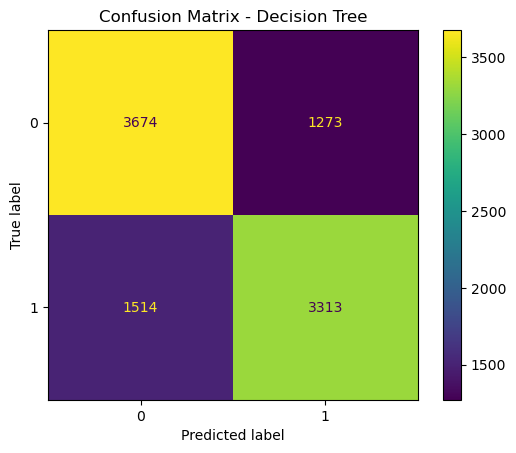

In [42]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix - Decision Tree')

In [ ]:
#pip install graphviz


In [36]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [39]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_18 <= 0.50
|   |--- feature_45 <= 0.50
|   |   |--- feature_30 <= 0.50
|   |   |   |--- feature_19 <= 0.50
|   |   |   |   |--- feature_46 <= 0.50
|   |   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |   |--- feature_37 <= 0.50
|   |   |   |   |   |   |   |--- feature_63 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_38 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_41 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_54 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 305
|   |   |   |   |   |   |   |   |   |   |--- feature_54 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 45
|   |   |   |   |   |   |   |   |   |--- feature_41 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3891 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 388
|   |   |   |   |   |   |   |   |   |   |--- feature_3891 >  0.50
|   |   |   |   |   |   

In [41]:
tree.plot_tree(clf)

[Text(0.9618192663311894, 0.9987468671679198, 'x[18] <= 0.5\ngini = 0.5\nsamples = 48866\nvalue = [24433, 24433]'),
 Text(0.9288533738929043, 0.9962406015037594, 'x[45] <= 0.5\ngini = 0.5\nsamples = 45995\nvalue = [23651, 22344]'),
 Text(0.8858368928808277, 0.993734335839599, 'x[30] <= 0.5\ngini = 0.498\nsamples = 40827\nvalue = [21736, 19091]'),
 Text(0.8570233030148262, 0.9912280701754386, 'x[19] <= 0.5\ngini = 0.497\nsamples = 39610\nvalue = [21391, 18219]'),
 Text(0.821628658487963, 0.9887218045112782, 'x[46] <= 0.5\ngini = 0.495\nsamples = 37477\nvalue = [20563, 16914]'),
 Text(0.7890402568426697, 0.9862155388471178, 'x[17] <= 0.5\ngini = 0.494\nsamples = 35696\nvalue = [19829, 15867]'),
 Text(0.7727417131140882, 0.9837092731829574, 'x[37] <= 0.5\ngini = 0.495\nsamples = 34594\nvalue = [19036, 15558]'),
 Text(0.747336404649023, 0.981203007518797, 'x[63] <= 0.5\ngini = 0.493\nsamples = 31534\nvalue = [17627, 13907]'),
 Text(0.7287445301574872, 0.9786967418546366, 'x[38] <= 0.5\ngin

Error in callback <function flush_figures at 0x0000027BBD73F790> (for post_execute):


KeyboardInterrupt: 

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.feature_names,  
                   class_names=y.target_names,
                   filled=True)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

<Figure size 2500x2000 with 0 Axes>

In [ ]:
def PlotBoundaries(model, X, Y, dot_size=20, figsize=(10,7)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=dot_size, edgecolor='k')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fitting the linear model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Visualize its results
PlotBoundaries(LR_model, X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"Train set accuracy: {LR_model.score(X_train, y_train)}")

Error: c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

In [ ]:
LogisticRegression(solver='lbfgs', max_iter=1000000)

## Natural Langauge Processing {#NLP}

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

Loading the dataset into a pandas dataframe with pd.read_csv()
then reducing it down to just the 'repair_status' and 'problem' columns

In [ ]:
#ldf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ldf = dfc
ldf = ldf[['repair_status', 'problem']]
ldf

looking for total "na" values in 'repair_status' column with .isna().sum() - found 0

In [ ]:
ldf['repair_status'].isna().sum()

looking for total "na" values in 'problem' column using .isna().sum() - found 15,045

In [ ]:
ldf['problem'].isna().sum()

replace all "Na" values with "blank"

In [ ]:
ldf = ldf.fillna('blank')

use .drop to remove all rows with "Unknown" in the 'repair_status' column to simplify modeling
and check to see that it took effect

In [ ]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Unknown'].index)
ldf['repair_status']

use .drop to remove all rows with "Repairable" in the 'repair_status' column to simplify modeling
and check to see that it took effect

In [ ]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Repairable'].index)
ldf['repair_status']

use .loc to find all rows with "Fixed" in the 'repair_status' column

In [ ]:
fixed_df = ldf.loc[ldf['repair_status'] == 'Fixed']
fixed_df

choosing a random sample of 1000 rows to make processing faster

In [ ]:
simple_data_f = fixed_df.sample(n=1000, random_state=1)
simple_data_f

tokenizing the text data using str.split() to create lists of words from every sentence

In [ ]:
simple_data_f['problem'].str.split(' ')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bagofwords = CountVectorizer()

bagofwords.fit(simple_data_f['problem'])

small_transformed = bagofwords.transform(simple_data_f['problem'])
small_transformed

In [ ]:
bagofwords.get_feature_names_out()

In [ ]:
small_transformed.toarray()

In [ ]:
# add more features
# more markdown
# multiple models
# hyperparameter tuning
# if every model is named uniquely ... fformatting 
# upsampling / downsampling 


In [ ]:
df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=small_transformed.toarray())
display(df)

## NLP ROUND 2

dividing the data between train and test sections using sklearn's train_test_split 

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

In [ ]:
#ndf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ndf = dfc

In [ ]:
ndf['country'].unique()

using df.loc[] and .isin() to select only the rows where the country has English as its first language, in order to select only English entries

In [ ]:
ndf = (df.loc[ndf['country'].isin(['GBR','CAN', 'AUS', 'NZL', 'IRL', 'USA'])])

In [ ]:
ndf = ndf.drop(ndf[ndf['repair_status'] == 'Unknown'].index)
ndf = ndf.drop(ndf[ndf['repair_status'] == 'Repairable'].index)
ndf['repair_status']

In [ ]:
ndf = ndf[['repair_status', 'problem']]
ndf

In [ ]:
ndf = ndf.fillna('0')

In [ ]:
X = ndf['problem']
y = ndf['repair_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
print(f"the shape of x_train is {X_train.shape}")

In [ ]:
#bagofwords = CountVectorizer()

#bagofwords.fit (X_train)

#X_train_transformed = bagofwords.transform(X_train)
#X_train_transformed

In [ ]:
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

[stemmer.stem(i) for i in ['run', 'runs', 'running', 'ran', 'jogged', 'jogging', 'jogs']]

In [ ]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

In [ ]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 1970, round(1970/10))

samples = [words[i] for i in some_indices]
print(samples)

In [ ]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

In [ ]:
len(bagofwords.get_feature_names_out())

In [ ]:
X_train_transformed.toarray().sum(axis=0)

bar graph of the Top 20 most frequently occurring words

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

removing English stop words

In [ ]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

bar graph of the Top 20 most frequently occurring words

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

In [ ]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 1970, round(1970/100))

samples = [words[i] for i in some_indices]
print(samples)

In [ ]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))
display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

In [ ]:
len(bagofwords.get_feature_names_out())

In [ ]:
X_train_transformed.toarray().sum(axis=0)

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(50).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 50 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Now we normalise the data
scalerX = StandardScaler().fit(X)
scalery = StandardScaler().fit(y.reshape(-1,1)) # Have to reshape to avoid warnings

normed_X = scalerX.transform(X)
normed_y = scalery.transform(y.reshape(-1,1)) # Have to reshape to avoid warnings

normed_y = normed_y.ravel() # Turn y back into a vector again

# Check it's worked
# print np.mean(X, axis=0), np.mean(y, axis=0) # Should be 0s
# print np.std(X, axis=0), np.std(y, axis=0)   # Should be 1s

In [ ]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)
y_pred = classifier.predict(X_test_transformed)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix_result = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)

disp.plot(cmap='viridis', values_format='d')

#plt.title('Confusion Matrix - NLP')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
logreg.coef_[0].shape

In [ ]:
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(15).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [ ]:
word_counts.sort_values("coefficients", ascending=True).head(15).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import os
os.makedirs('/output/' , exist_ok=True)
negw = word_counts.sort_values("coefficients", ascending=True).head(15)
negw.to_csv('~/Desktop/BrainStation-Data-Science-Capstone/Notebooks/output/out_stem_neg.csv')
posw = word_counts.sort_values("coefficients", ascending=False).head(15)
posw.to_csv('~/Desktop/BrainStation-Data-Science-Capstone/Notebooks/output/out_stem_pos.csv')

In [ ]:
word_counts

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [ ]:
# Instantiate models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=10)
svc = SVC(kernel='rbf')
linear_svc = LinearSVC()

# Fit models
knn.fit(X_train_transformed, y_train)
dt.fit(X_train_transformed, y_train)
svc.fit(X_train_transformed, y_train)
linear_svc.fit(X_train_transformed, y_train)

In [ ]:
print(f'KNN train: {knn.score(X_train_transformed, y_train)} KNN test:{knn.score(X_test_transformed, y_test)}')
print(f'DT train: {dt.score(X_train_transformed, y_train)} DT test:{dt.score(X_test_transformed, y_test)}')
print(f'SVM RBF train: {svc.score(X_train_transformed, y_train)} SVM RBF Test:{svc.score(X_test_transformed, y_test)}')
print(f'SVM linear train: {linear_svc.score(X_train_transformed, y_train)} SVM linear test: {linear_svc.score(X_test_transformed, y_test)}')

In [ ]:
word_counts.head(40)

In [ ]:
y_train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:

# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)

In [ ]:
y_pred = classifier.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()